# Regression using Tensorflow

Created by:
### **[Prashant Brahmbhatt](www.linkedin.com/in/prashantbrahmbhatt)  **  

[GitHub](www.github.com/hashbanger)


### Creating Data

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [100]:
#Using 100k points
x_data = np.linspace(0, 10, 100000)

In [101]:
noise = np.random.randn(len(x_data))

In [102]:
# y = mx + c
b = 5

y_true = 0.5*(x_data ) + 5 + noise

In [103]:
data = pd.concat([pd.DataFrame(x_data, columns=['x data']),
                 pd.DataFrame(y_true, columns=['y'])], 
                 axis= 1)
data.head()

,x data,y
0,0.0000,5.258604
1,0.0001,5.753822
2,0.0002,4.440590
3,0.0003,6.457207
4,0.0004,5.467934


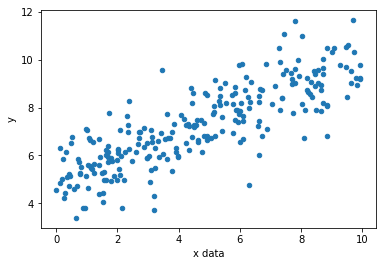

In [104]:
data.sample(n = 250).plot(kind = 'scatter', x = 'x data', y = 'y')

## Tensorflow 

Rather than feeding the data all at once we can feed data in batches of fixed sizes.

In [105]:
#We choose 10 points in each batch
batch_size = 10

#### Variables

In [106]:
np.random.randn(2)

array([0.39889387, 0.75271654])

In [107]:
m = tf.Variable(1.70)
b = tf.Variable(1.47)

#### Placeholders

In [108]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

#### Graph

In [109]:
y_model = m* xph + b

#### Loss Function

In [110]:
error  = tf.reduce_sum(tf.square(yph- y_model))

#### Optimzer

In [111]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

#### Initialize Variables

In [112]:
init = tf.global_variables_initializer()

### Creating Session

In [113]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 2000
    # we will only be using 10000 points as they will be sufficient to pick up obvious relationship
    
    for i in range(batches):
        
        rand_int = np.random.randint(len(x_data), size= batch_size)
        
        feed = {xph: x_data[rand_int], yph: y_true[rand_int]}
        
        sess.run(train, feed_dict = feed)
        
    model_slope, model_bias = sess.run([m, b])
        
        

In [114]:
model_slope

0.49360478

In [115]:
model_bias

5.0439377

### Results

In [116]:
y_pred = x_data * model_slope + model_bias

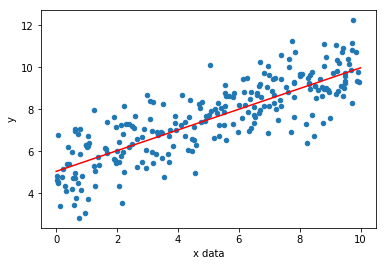

In [117]:
data.sample(n = 250).plot(kind = 'scatter', x = 'x data', y = 'y')
plt.plot(x_data, y_pred, 'r')

## -------------------------------------------------------------------------------------------------------------------------------

# Tensorflow Estimator API

To use the **Estimator API** we proceed as following:

* Create a list of feature columns
* Create the Estimator Model
* Create a Data Input function
* Call train, evaluate and predict methods on the estimator object.

In [127]:
feat_cols = tf.feature_column.numeric_column('x', shape = [1])

In [128]:
estimator = tf.estimator.LinearRegressor(feature_columns= feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': None, '_log_step_count_steps': 100, '_task_id': 0, '_session_config': None, '_task_type': 'worker', '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\prash\\AppData\\Local\\Temp\\tmphk118vdt', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000254857A1CF8>, '_evaluation_master': '', '_keep_checkpoint_max': 5, '_global_id_in_cluster': 0, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_master': '', '_save_checkpoints_steps': None, '_is_chief': True, '_num_worker_replicas': 1, '_service': None}


### Train Test Split


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size = 0.3, random_state = 101)

In [131]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(70000,)
(70000,)
(30000,)
(30000,)


### Setting Up Estimator Inputs

In [132]:
input_fnc = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size= 4,
                                              num_epochs= None, shuffle= True)

In [133]:
# Creating two more input functions to compare metrics
train_input_fn = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size= 4,
                                              num_epochs= 1000, shuffle= False)

In [134]:
test_input_fn = tf.estimator.inputs.numpy_input_fn({'x': x_test}, y_test, batch_size= 4,
                                              num_epochs= 1000, shuffle= False)

### Train the Estimator

In [ ]:
estimator.train(input_fn= input_fnc , steps= 1)

### Evaluation

In [ ]:
train_metrics = estimator.evaluate(input_fn= train_input_fn, steps =1000)

In [ ]:
test_metrics = estimator.evaluate(input_fn= = test_input_fn, steps= 1000)

In [ ]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

### Predictions 

In [ ]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': np.linspace(0,10,10)}, shuffle= False)

In [ ]:
list(estimator.predict(input_fn= input_fn_predict))

In [ ]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

In [ ]:
predictions

In [ ]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')

#### Voila!

In [ ]:
x